In [1]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from random import choices,sample

import os
import gc
import pickle

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

os.chdir("../../")
root_path = os.getcwd()

raw_file_path = os.path.join(root_path, "Bigcon2020_raw_file")
csv_file_path = os.path.join(root_path, "BigCon_2020/csv_files")
pickle_file_path = os.path.join(root_path, "BigCon_2020/pickle_files")

raw_file_folders = os.listdir(raw_file_path)

In [80]:
[file for file in os.listdir(csv_file_path) if file.startswith("카드")]

['카드_내국인.csv', '카드_외국인.csv']

In [2]:
pd.read_csv(os.path.join(csv_file_path,[file for file in os.listdir(csv_file_path) if file.startswith("카드")][0]))

,Unnamed: 0,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,0,20190204,260,510,81,대만,2,30.0
1,1,20190213,260,510,40,대만,2,32.0
2,2,20190416,260,510,40,대만,2,16.0
3,3,20190419,260,510,42,대만,3,610.0
4,4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...,...
238824,238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,238827,20200516,350,640,71,오스트레일리아,1,39.0


In [3]:
folder_path = os.path.join(raw_file_path, raw_file_folders[1])

In [9]:
sub_folder = [sub for sub in os.listdir(folder_path) if sub.startswith('CARD')]

In [15]:
df_list = [pd.read_table(os.path.join(folder_path, sub, f'{sub}.txt'), encoding='cp949') for sub in sub_folder]

In [19]:
foreigner, resident = df_list

In [ ]:
foreigner.to_excel("")

In [73]:
cat_dict = {10 : '숙박',
20 : '레저용품',
21 : '레저업소',
22 : '문화취미',
30 : '가구',
31 : '전기',
32 : '주방용구',
33 : '연료판매',
34 : '광학제품',
35 : '가전',
40 : '유통업',
42 : '의복',
43 : '직물',
44 : '신변잡화',
50 : '서적문구',
52 : '사무통신',
60 : '자동차판매',
62 : '자동차 정비',
70 : '의료기관',
71 : '보건위생',
80 : '요식업소',
81 : '음료식품',
92 : '수리서비스'}

In [22]:
resident

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [37]:
tmp_df = resident.groupby(['MCT_CAT_CD','SEX_CD','AGE_CD'])['USE_AMT'].sum().reset_index()

In [ ]:
tmp_df['rate_ca'] = ( resident.groupby(['MCT_CAT_CD','SEX_CD','AGE_CD'])['USE_AMT'].sum().\
                            reset_index().\
                            groupby(['MCT_CAT_CD','AGE_CD'])['USE_AMT'].apply(lambda x:x/x.sum())
                 )

tmp_df['rate_cs'] = ( resident.groupby(['MCT_CAT_CD','SEX_CD','AGE_CD'])['USE_AMT'].sum().\
                            reset_index().\
                            groupby(['MCT_CAT_CD','SEX_CD'])['USE_AMT'].apply(lambda x:x/x.sum())
                 )

tmp_df['rate_c'] = ( resident.groupby(['MCT_CAT_CD','SEX_CD','AGE_CD'])['USE_AMT'].sum().\
                            reset_index().\
                            groupby(['MCT_CAT_CD'])['USE_AMT'].apply(lambda x:x/x.sum())
                 )

c:\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


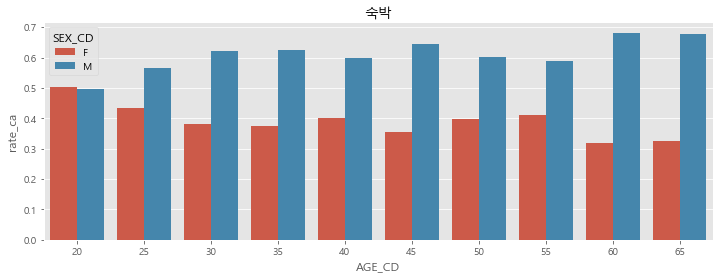

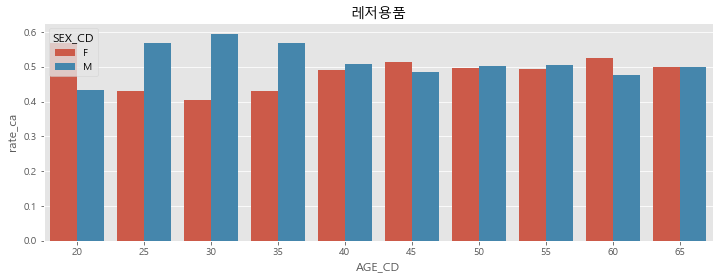

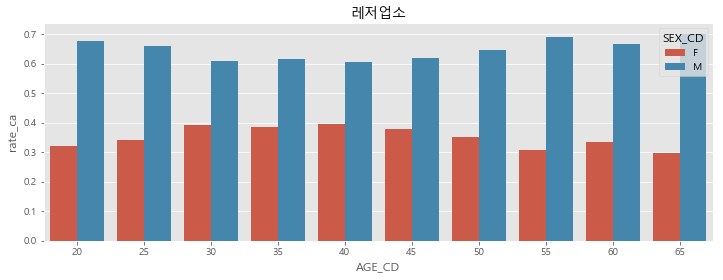

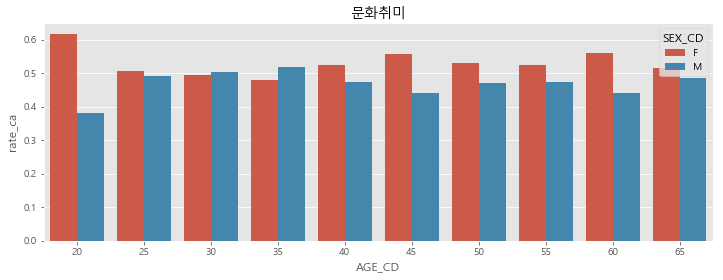

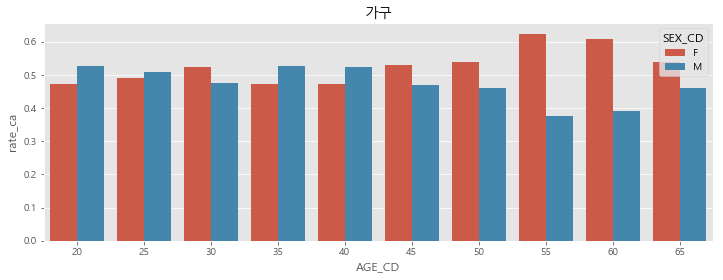

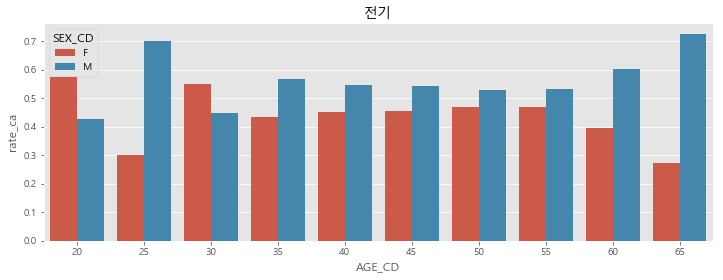

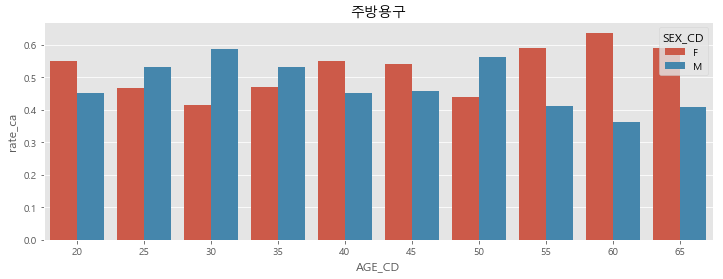

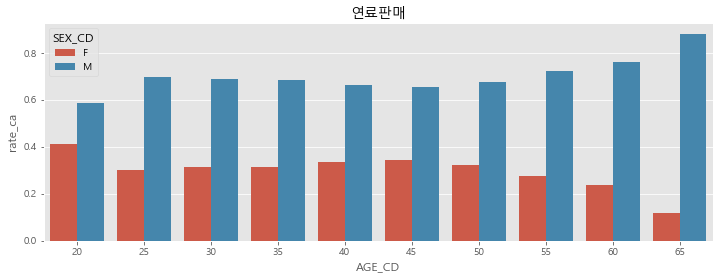

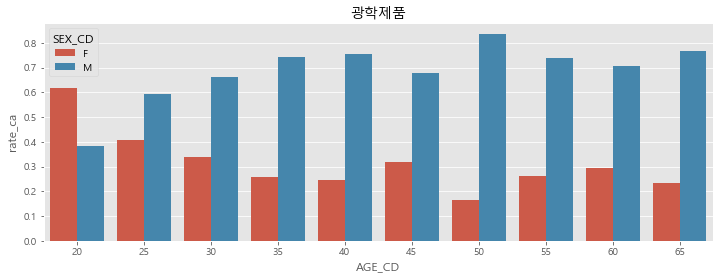

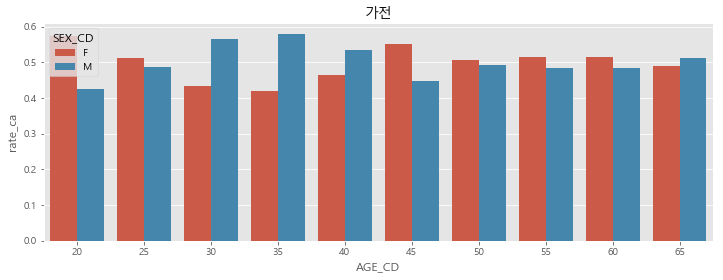

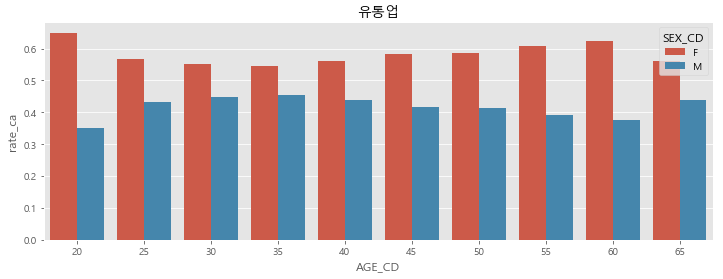

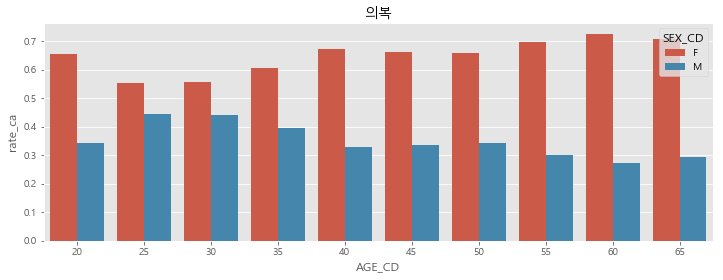

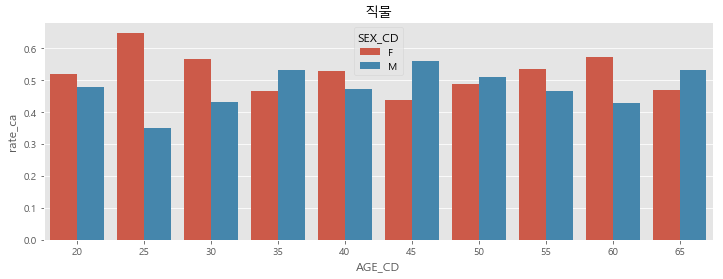

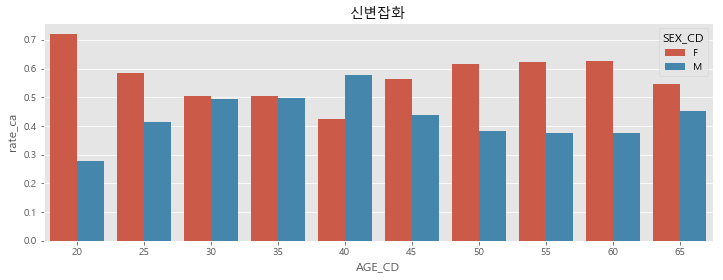

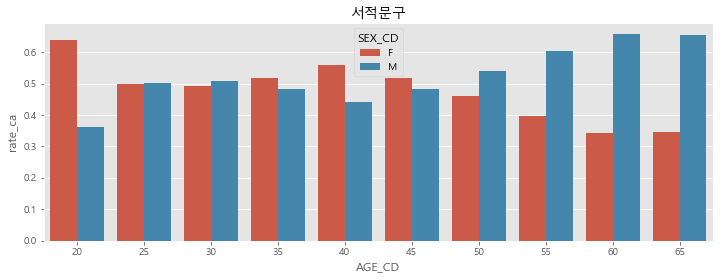

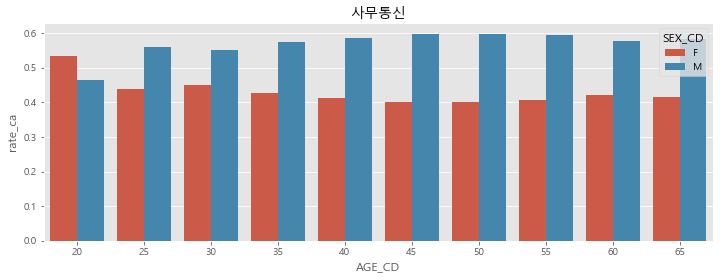

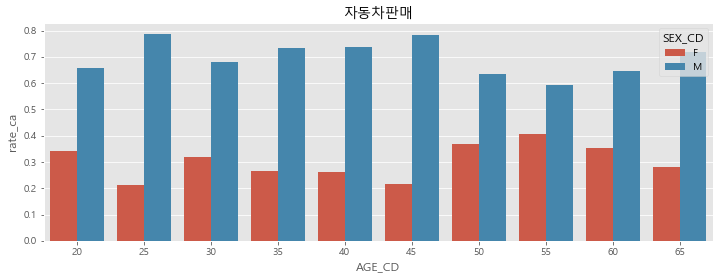

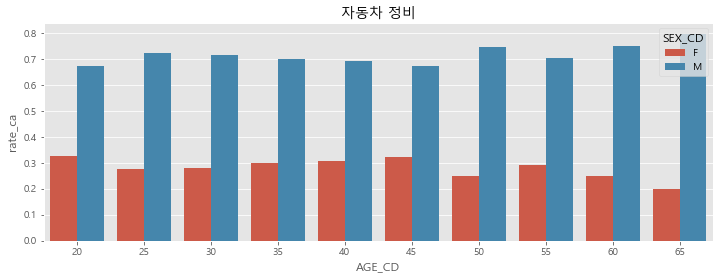

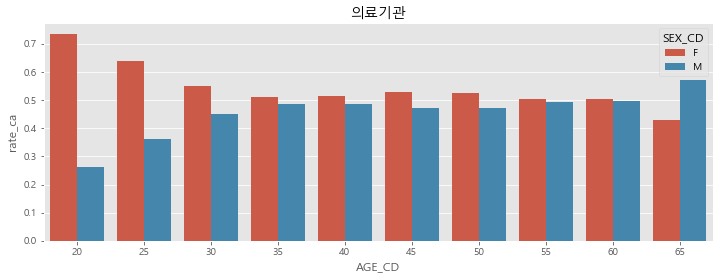

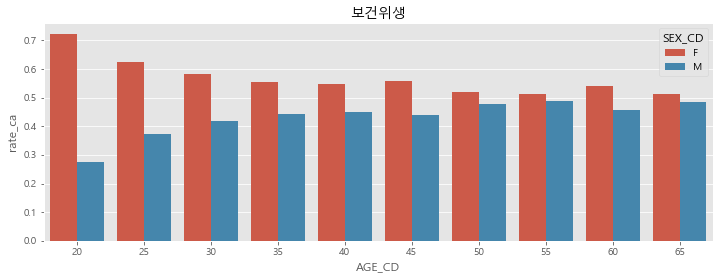

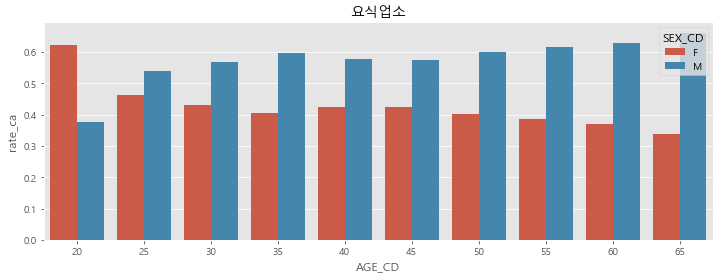

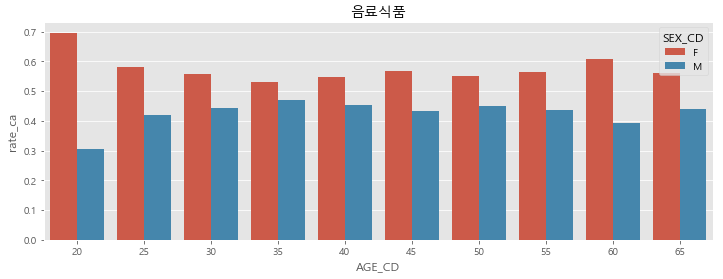

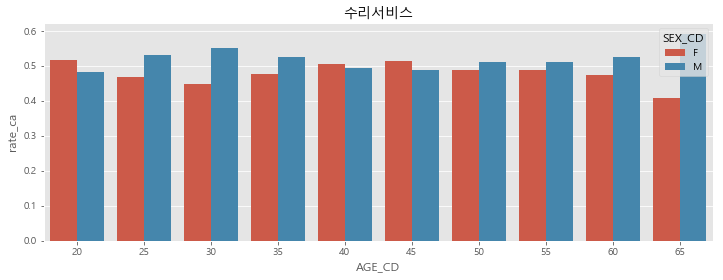

In [78]:
for cat in tmp_df.MCT_CAT_CD.unique():
    tmp = tmp_df.loc[tmp_df.MCT_CAT_CD==cat]
    
    plt.figure(figsize=(12,4))
    sns.barplot(
        x = tmp.AGE_CD,
        y = tmp.rate_ca,
        hue = tmp.SEX_CD
    )
    
    plt.title(f'{cat_dict.get(cat)}', fontsize=14)

Text(0.5, 1.0, '숙박')

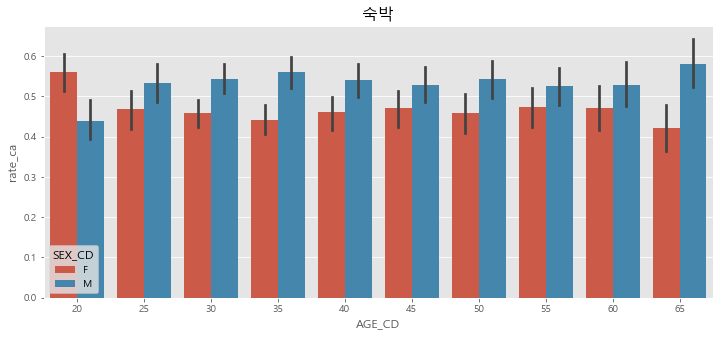

In [76]:
plt.figure(figsize=(12,5))
sns.barplot(
    x=tmp_df.AGE_CD,
    y=tmp_df.rate_ca,
    hue = tmp_df.SEX_CD
)

plt.title(f'{cat_dict.get(10)}', fontsize=16)

In [65]:
tmp_df.head(20)

,MCT_CAT_CD,SEX_CD,AGE_CD,USE_AMT,rate_ca,rate_c,rate_cs
0,10,F,20,1527907,0.501978,0.014538,0.038127
1,10,F,25,4684555,0.434689,0.044572,0.116899
2,10,F,30,5567032,0.379924,0.052969,0.138920
3,10,F,35,4875372,0.375511,0.046388,0.121660
4,10,F,40,4084597,0.400365,0.038864,0.101927
5,10,F,45,3711520,0.356349,0.035314,0.092617
6,10,F,50,3780978,0.398310,0.035975,0.094351
7,10,F,55,4831249,0.411593,0.045968,0.120559
8,10,F,60,2945289,0.318318,0.028024,0.073497
9,10,F,65,4065144,0.324118,0.038679,0.101442


In [43]:
from itertools import product

In [53]:
tmp_df.query('MCT_CAT_CD==10')

,MCT_CAT_CD,SEX_CD,AGE_CD,USE_AMT,rate
0,10,F,20,1527907,0.014538
1,10,F,25,4684555,0.044572
2,10,F,30,5567032,0.052969
3,10,F,35,4875372,0.046388
4,10,F,40,4084597,0.038864
5,10,F,45,3711520,0.035314
6,10,F,50,3780978,0.035975
7,10,F,55,4831249,0.045968
8,10,F,60,2945289,0.028024
9,10,F,65,4065144,0.038679


,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194
